In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:title={'center':'summary of missing values'}>

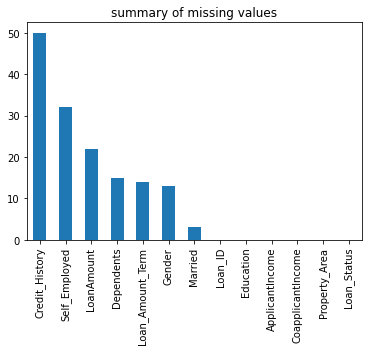

In [6]:
df.isnull().sum(). sort_values(ascending =False).plot(kind='bar',title='summary of missing values')

In [7]:
categorical_features=df.select_dtypes('object').columns
categorical_features

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
numerical_features=df.select_dtypes(exclude = 'object').columns
numerical_features

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
for i in categorical_features:
    df[i].fillna(method='ffill',inplace=True)

In [10]:
for i in numerical_features:
    df[i].fillna(method='bfill',inplace=True)

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [13]:
df['Dependents'].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [14]:
df['Gender'].replace({"Male":0,"Female":1},inplace=True)
df['Married'].replace({"No":0,"Yes":1},inplace=True)
df['Dependents'].replace({'3+':3},inplace=True)
df['Property_Area'].replace({'Urban':0,'Semiurban':1,'Rural':2},inplace=True)
df['Self_Employed'].replace({'No':1,'Yes':0},inplace=True)
df.drop(['Loan_ID'],axis=1,inplace=True)
df['Dependents']=df['Dependents'].astype(int)

In [15]:
df['Gender']

0      0
1      0
2      0
3      0
4      0
      ..
609    1
610    0
611    0
612    0
613    1
Name: Gender, Length: 614, dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Education']=label.fit_transform(df['Education'])
df['Education'].value_counts()

0    480
1    134
Name: Education, dtype: int64

In [17]:
x=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status'].replace({'Y':1,'N':0})

In [18]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [19]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
ros=RandomOverSampler(random_state=42)
X,Y=ros.fit_resample(x,y)

In [20]:
Y

0      1
1      0
2      1
3      1
4      1
      ..
839    0
840    0
841    0
842    0
843    0
Name: Loan_Status, Length: 844, dtype: int64

In [21]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [23]:
y_train

425    1
660    0
417    0
759    0
90     1
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 633, dtype: int64

<AxesSubplot:>

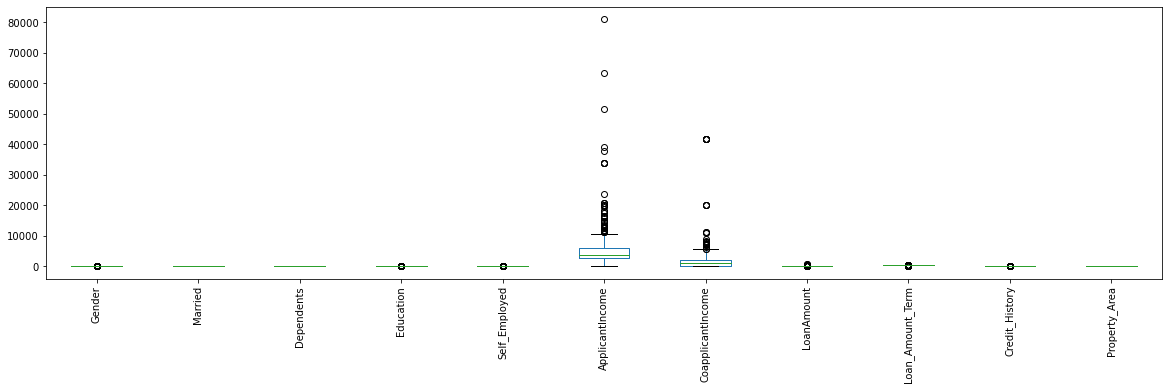

In [24]:
x_train.plot.box(figsize=(20,5),rot=90)

<AxesSubplot:>

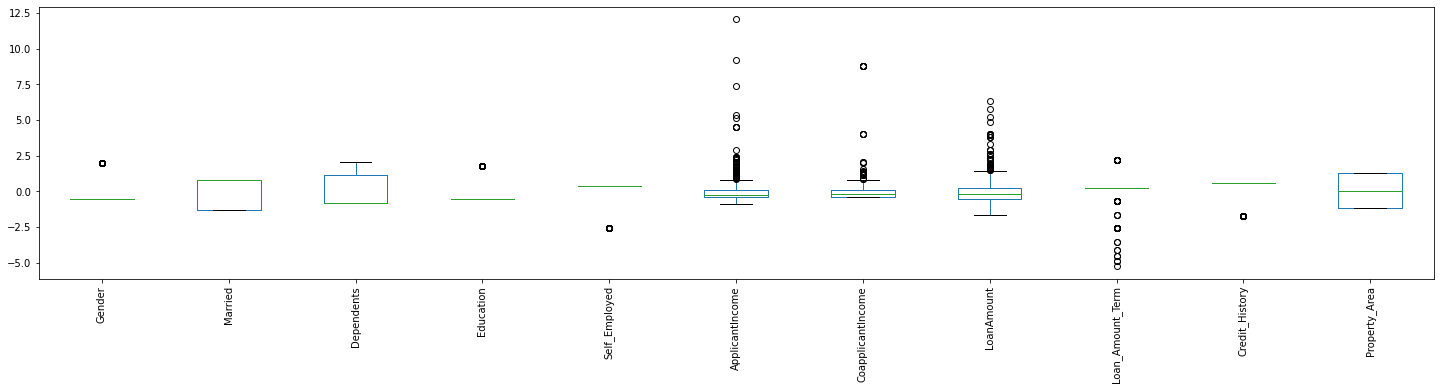

In [25]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scale=ss.fit(x_train)
scaled_train=scale.transform(x_train)
scaled_test=scale.fit_transform(x_test)
pd.DataFrame(scaled_train,columns=x_train.columns).plot.box(figsize=(25,5),rot=90)

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [27]:
lr=LogisticRegression()
model=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)


C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
acc= accuracy_score(y_pred,y_test)
acc

0.7251184834123223

In [29]:
rfc=RandomForestClassifier()
model1=rfc.fit(x_train,y_train)

In [30]:
y_pred1=rfc.predict(x_test)

In [31]:
y_test

493    1
215    1
622    0
737    0
63     0
      ..
210    0
361    1
500    1
558    1
398    1
Name: Loan_Status, Length: 211, dtype: int64

In [32]:
acc1=accuracy_score(y_pred1,y_test)
acc1

0.8530805687203792

In [33]:
import pickle
pickle.dump(rfc,open('model.pkl','wb'))
rfc=pickle.load(open('model.pkl','rb'))

In [34]:
x_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [35]:
df['Property_Area'].unique()

array([0, 2, 1], dtype=int64)

In [36]:
rfc.feature_importances_

array([0.02465775, 0.02658996, 0.05567736, 0.02483976, 0.0201269 ,
       0.19790748, 0.11601738, 0.19690444, 0.03723212, 0.24572411,
       0.05432275])

In [37]:
x_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
425,0,1,0,0,1,2666,4300.0,121.0,360.0,1.0,2
660,1,0,1,1,1,4606,0.0,81.0,360.0,1.0,2
417,0,1,2,0,0,1600,20000.0,239.0,360.0,1.0,0
759,0,1,1,0,0,2178,0.0,66.0,300.0,0.0,2
90,0,1,0,0,1,2958,2900.0,131.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
71,0,1,2,1,0,1875,1875.0,97.0,360.0,1.0,1
106,0,1,2,0,1,11417,1126.0,225.0,360.0,1.0,0
270,1,0,0,0,1,3237,0.0,30.0,360.0,1.0,0
435,1,0,0,0,1,10047,0.0,50.0,240.0,1.0,1


In [38]:
rfc.predict([[1,1,1,1,1,1,1,1,1,1,1]])

C:\Users\Personal\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [40]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
a=['Male','Yes',1,'Graduate','No',30000,4000,100000,360,1,'Urban']
a

['Male', 'Yes', 1, 'Graduate', 'No', 30000, 4000, 100000, 360, 1, 'Urban']

In [48]:
a[0:4]

['Male', 'Yes', 1, 'Graduate']